# Regresión Lineal 2

Como se vió con anterioridad, utilizando redes neuronales se puede modelar el comportamiento una función lineal continua. En este ejercicio trataremos de crear una arquitectura capaz de aproximar la función $f(x) = x^2$. Deberas jugar con el número de capaz y el número de neuronas necesarias para aproximar la base de datos dada.

In [23]:
# Cargamos las librerías requeridas y comandos necesarios de Jupyter para matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

import regresion_lineal_2 as ut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Creación de la Base de Datos

La base de datos consiste en dos conjuntos de 10 ejemplos cada uno, **train** y **test**. Los ejemplos que están en un conjunto no se repiten en el otro.

In [22]:
# Rango de la base de datos y el numero de elementos
init = -10
end = 10
steps = 20

# Se crean todos los valores de X y Y
X = np.linspace(init,end,steps)
Y = X**2

# Seleccionamos los elementos para train
ind = np.arange(0,steps,2)
X_train = X[ind]
Y_train = Y[ind]

# Seleccionamos los elementos para test
ind = np.arange(1,steps,2)
X_test = X[ind]
Y_test = Y[ind]

In [3]:
# Encapsulamos los conjuntos en la clase Data para un 
# manejo mas sencillo.
train = ut.Data(x=X_train,y=Y_train)
test = ut.Data(x=X_test,y=Y_test)

# Definimos el Modelo Mediante Grafos

Conforme al funcionamiento de los grafos en TensorFlow, creamos las variables por donde se introducirá la información. Cuando utilizamos None en la definición del tamaño del placeholder, indica que acepta un número dinámico de elementos de entrada.

In [4]:
inp_x = tf.placeholder(tf.float32,shape=[None,1],name='inp_x')
gt_y = tf.placeholder(tf.float32,shape=[None,1],name='gt_y')

Procedemos a definir la arquitectura que vamos a utilizar.

In [5]:
##### Inicia: Aqui debes editar la arquitectura
layer1 = tf.layers.dense(inputs=inp_x,units=1,activation=tf.nn.relu,name='layer1') # Neurona con una salida (units=1)
y_pred = tf.layers.dense(inputs=layer1,units=1,name='y_pred') # Predicciones.
##### Termina: Aqui termina tu codigo.

print(y_pred)

Tensor("y_pred:0", shape=(?, 1), dtype=float32)


# Función de Perdida

Cuando utilizamos Deep Learning, para desarrollar un buen modelo hace falta el poder determinar el desempeño con respecto a una base de datos. La función de perdida nos permite calcular el error de nuestra arquitectura a partir de las predicciones con respecto a las reales.

Para este ejemplo utilizaremos el **MSE** (Mean Square Error, o Error Cuadrático Promedio en español). Donde el error por cada ejemplo entrenado es:

\begin{align}
loss_i = (Y_i - Ŷ_i)^2
\end{align}

Y donde la función de perdida final queda expresada:

\begin{align}
L = \frac{1}{n} \sum_{i=0}^{n} loss_i
\end{align}

In [6]:
# Definimos la función de perdida
loss = tf.pow(gt_y - y_pred,2.,name='loss')
cost = tf.reduce_mean(loss,name='cost')

print('loss: {}'.format(loss))
print('cost: {}'.format(cost))

loss: Tensor("loss:0", shape=(?, 1), dtype=float32)
cost: Tensor("cost:0", shape=(), dtype=float32)


# Back Propagation

Una vez que tenemos la arquitectura y la función de perdida definidas, el siguiente paso es seleccionar el metodo de optimización que se desea utilizar. Para este ejemplo se utilizará **Adam Optimizer** juto con una taza de aprendizaje de 0.0001.

In [7]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

Conforme al funcionamiento de TensorFlow, creamos la sesión donde se ejecutará todo nuestro grafo.

In [8]:
sess = tf.Session()

Se inicializan los pesos aleatoreamente.

In [9]:
sess.run(tf.global_variables_initializer())

Se crea una función auxiliar que permitirá obtener los valores ŶŶ dados XX.

In [10]:
def predict(x):
    # Predice los valores de y correspondientes a x.
    # Args:
    #    x (np.array): Valores X a los que se desea predecir Y.
    #        Su forma debe de ser [None,1]
    # Returns
    #    pred (np.array): Regresa los valores Y predichos.
    #        Su forma es de [None,1]
    fd = {inp_x:x}
    pred = sess.run(y_pred,feed_dict=fd)
    return(pred)

Se crea una función auxiliar para entrenar a la red.

In [11]:
def train_nn(iters,train_set,bs=1):
    # Entrena a la red neuronal
    # Args:
    #    iters (int): Numero de iteraciones
    #    train_set (Data): Base de datos con la que se entrenara
    #    bs (int): Tamaño del sub set con el que se entrenara cada iteracion
    pbar = tqdm(range(iters))
    for i in pbar:
        next_bs = train_set.next_batch(bs)
        
        fd = {inp_x:next_bs[0],gt_y:next_bs[1]}
        cst,_ = sess.run([cost,optimizer],feed_dict=fd)
        pbar.set_description('Cost: {:.4f}'.format(float(cst)))

In [12]:
def train_nn_viz(iters,train_set,bs=1):
    %matplotlib notebook
    # Entrena a la red neuronal y muestra el la evolución de los resultados graficamente
    # Args:
    #    iters (int): Numero de iteraciones
    #    train_set (Data): Base de datos con la que se entrenara
    #    bs (int): Tamaño del sub set con el que se entrenara cada iteracion    
    
    # Creamos una figura donde dibujar
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    
    # Indicamos los limites de nuestros ejes
    #plt.xlim(-1, 10)
    #plt.ylim(-1, 10)
    #plt.gca().set_aspect('equal', adjustable='box')
    
    # Mostramos la figura
    fig.show()
    fig.canvas.draw()
    
    test_data = test.next_batch(10)
    
    pbar = tqdm(range(iters))
    for i in pbar:
        next_bs = train_set.next_batch(bs)
        fd = {inp_x:next_bs[0],gt_y:next_bs[1]}
        cst,_ = sess.run([cost,optimizer],feed_dict=fd)
        
        pbar.set_description('Cost: {:.4f}'.format(float(cst)))
        
        if i%50==0:
            # Limpiamos el contenido de la figura
            ax.clear()
            pred = predict(test_data[0])
            
            # Dibujamos la linea
            ax.plot(test_data[0],test_data[1],'b*') # Puntos verdaderos -> Azul
            ax.plot(test_data[0],pred,'r*') # Puntos predecidos -> Rojo
            fig.canvas.draw()
    %matplotlib inline

Obtenemos un subconjunto de ejemplos de la base de datos de prueba para visualizar las predicciones que tiene antes y despues de ser entrenada.

In [13]:
test_data = test.next_batch(7)

Predecimos los valores de $Ŷ$ dado $X$.

In [ ]:
pred = predict(test_data[0])
print('GTx: {}\nGTy: {}\nPRy: {}'.format(test_data[0].T,test_data[1].T,pred.T))

Entrenamos nuestro modelo utilizando la base de datos "train".

<IPython.core.display.Javascript object>


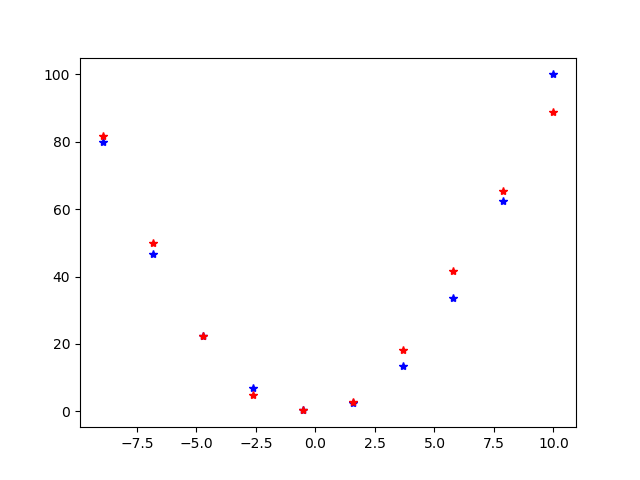

Cost: 8.2751: 100%|██████████| 3000/3000 [00:11<00:00, 256.40it/s] 


In [21]:
train_nn_viz(iters=1,train_set=train,bs=3)

Volvemos a predecir $Ŷ$ dado $X$ para ver la evolución de los resultados.

In [ ]:
pred = predict(test_data[0])
print('GTx: {}\nGTy: {}\nPRy: {}'.format(test_data[0].T,test_data[1].T,pred.T))

# Nota: Una vez optimizado recuerda....

A pesar de que obtengamos buenos resultados, hay que tener cuidado. Debemos recordar al ser solo una aproximación siempre tendremos un error $\epsilon$ y estaremos limitados al rango original de la base de datos de entrenamientos \[a,b\]. Si tratamos de predecir $X$s que se encuentran fuera del rango \[a,b\] notaremos que los resultados tienen un erroe mayor a $\epsilon$. 

In [18]:
# Data
Q = np.linspace(40,50,10)
R = Q**2
QR = ut.Data(x=Q,y=R)

# ¿Que pasa si probamos nuestro modelo con informacion fuera del rango?
qr_data = QR.next_batch(5)

In [ ]:
qr_pred = predict(qr_data[0])

print('GTx: {}\nGTy: {}\nPRy: {}'.format(qr_data[0].T,qr_data[1].T,qr_pred.T))

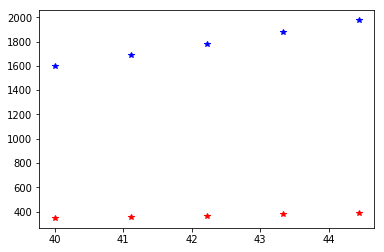

In [20]:
plt.plot(qr_data[0],qr_data[1],'b*')
plt.plot(qr_data[0],qr_pred,'r*')